In [1]:
import numpy as np
import pandas as pd

import datetime

In [2]:
weather = pd.read_csv("data/weather_v1.csv")
weather.head()

C:\Users\lonj7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,area,datetime,temp,temp_QCFlag,prec,prec_QCFlag,ws,ws_QCFlag,wd,wd_QCFlag,...,vis,sfctype,weathernumber,sfctemp,sfctemp_QCFlag,landtemp_5cm,landtemp_10cm,landtemp_20cm,landtemp_30cm,station
0,184,2018-02-01 01:00,4.7,0.0,NaN,NaN,3.6,0.0,20.0,0.0,...,1950.0,NaN,NaN,2.9,0.0,3.7,3.9,4.2,4.9,ASOS
1,184,2018-02-01 02:00,4.8,0.0,NaN,NaN,2.6,0.0,360.0,0.0,...,1865.0,NaN,NaN,2.9,0.0,3.6,3.8,4.2,4.9,ASOS
2,184,2018-02-01 03:00,4.8,0.0,NaN,NaN,4.6,0.0,20.0,0.0,...,1855.0,NaN,NaN,3.0,0.0,3.6,3.8,4.3,4.9,ASOS
3,184,2018-02-01 04:00,4.5,0.0,NaN,NaN,5.7,0.0,20.0,0.0,...,1425.0,NaN,NaN,3.0,0.0,3.6,3.8,4.2,5.0,ASOS
4,184,2018-02-01 05:00,4.5,0.0,NaN,9.0,4.4,0.0,20.0,0.0,...,1043.0,NaN,1.0,3.0,0.0,3.5,3.8,4.2,4.9,ASOS


In [3]:
# check the area's number
# an: area number
an = pd.read_csv("data/lookupTable_area.csv")
len(an[:])

39

In [4]:
weather.datetime = pd.to_datetime(weather.datetime)

In [5]:
weather = weather.set_index(weather.datetime)
weather = weather.drop('datetime', axis=1)
weather.index = weather.index.rename('date')

In [6]:
weather.drop(['temp_QCFlag', 'prec_QCFlag',
              'ws_QCFlag', 'wd_QCFlag', 'humid_QCFlag', 
              'landP_QCFlag', 'seaP_QCFlag',
              'suntime_QCFlag', '3hr_snow', 'lowmiddleC',
              'typeC', 'weathernumber', 
              'sfctemp', 'sfctemp_QCFlag', 'landtemp_5cm', 
              'landtemp_10cm', 'landtemp_20cm', 'landtemp_30cm',
              'station', 'rad'],
            axis=1, inplace=True)

In [7]:
# devide the Jeju in 6 section
# east, west, south, north, center, islands

# east: 861, 781, 751, 330, 188, 792
we = weather[(weather['area'] == 861) | (weather['area'] == 781) |
             (weather['area'] == 751) | (weather['area'] == 330) |
             (weather['area'] == 188) | (weather['area'] == 792)]

# west: 893, 779, 727, 880, 883, 793
ww = weather[(weather['area'] == 893) | (weather['area'] == 779) |
             (weather['area'] == 727) | (weather['area'] == 880) |
             (weather['area'] == 883) | (weather['area'] == 793)]

# south: 885, 891, 189, 780, 890, 328, 884
ws = weather[(weather['area'] == 885) | (weather['area'] == 891) |
             (weather['area'] == 189) | (weather['area'] == 780) |
             (weather['area'] == 890) | (weather['area'] == 328) |
             (weather['area'] == 884)]

# north: 184, 185, 865, 752, 329
wn = weather[(weather['area'] == 184) | (weather['area'] == 185) |
             (weather['area'] == 865) | (weather['area'] == 752) |
             (weather['area'] == 329)]

# center: 753, 862, 868, 866, 782, 867, 869, 870
wc = weather[(weather['area'] == 753) | (weather['area'] == 862) |
             (weather['area'] == 868) | (weather['area'] == 866) |
             (weather['area'] == 782) | (weather['area'] == 867) |
             (weather['area'] == 869) | (weather['area'] == 870)]
             
# island: 724, 725, 726, 855, 863
wi = weather[(weather['area'] == 724) | (weather['area'] == 725) |
             (weather['area'] == 727) | (weather['area'] == 855) |
             (weather['area'] == 863)]

weather.drop('area', axis=1, inplace=True)

In [8]:
len(wi.columns)

16

In [9]:
wi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87366 entries, 2018-02-01 01:00:00 to 2020-01-31 23:00:00
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   area     87366 non-null  int64  
 1   temp     86835 non-null  float64
 2   prec     86866 non-null  float64
 3   ws       86634 non-null  float64
 4   wd       86636 non-null  float64
 5   humid    86942 non-null  float64
 6   vaporP   0 non-null      float64
 7   dew      0 non-null      float64
 8   landP    18758 non-null  float64
 9   seaP     18758 non-null  float64
 10  suntime  0 non-null      float64
 11  snow     0 non-null      float64
 12  C        0 non-null      float64
 13  ceiling  0 non-null      float64
 14  vis      0 non-null      float64
 15  sfctype  0 non-null      float64
dtypes: float64(15), int64(1)
memory usage: 11.3 MB


In [10]:
def mmms(df, st):
    
    index = pd.date_range('2018-02-01', '2020-01-31')
    columns = []
    data = pd.DataFrame(index=index, columns=columns)
    
    features = df.columns[1:-1]
    df.fillna(0)
    
    for f in features:
        data["%s_%s_max" %(str(st), str(f))] = df[f].resample('d').max()
        data["%s_%s_min" %(str(st), str(f))] = df[f].resample('d').min()
        data["%s_%s_mean" %(str(st), str(f))] = df[f].resample('d').mean()
        data["%s_%s_sum" %(str(st), str(f))] = df[f].resample('d').sum()
    
    return data

In [11]:
weather_1 = mmms(weather, 'all')
we_1 = mmms(we, 'we')
ww_1 = mmms(ww, 'ww')
ws_1 = mmms(ws, 'ws')
wn_1 = mmms(wn, 'wn')
wc_1 = mmms(wc, 'wc')
wi_1 = mmms(wi, 'wi')

In [12]:
weather_data = pd.concat([weather_1, we_1, ww_1, ws_1, wn_1, wc_1, wi_1], axis=1)
weather_data = weather_data.fillna(0)

In [13]:
# fuel price
import pandas_datareader as pdr

# LNG: LNG
# Crude Oil: CL=F
# Coal(Australia): AQC.AX

fuel_price = pdr.get_data_yahoo(['LNG', 'CL=F', 'AQC.AX'],
                            start=datetime.datetime(2018, 2, 2),
                            end=datetime.datetime(2020, 1, 31)
                            )['Open']

fuel_price = fuel_price.reindex(pd.date_range('2018-02-01', '2020-01-31')).fillna(method='backfill')
fuel_price = fuel_price.rename(columns={"LNG": "LNG", "CL=F": "Oil", "AQC.AX": "Coal"}, errors="raise")

C:\Users\lonj7\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [14]:
fuel_price.Coal[-1] = 0.1550000011920929

In [15]:
# KOSPI: ^KS11
# KOSDAQ: ^KQ11

stock = pdr.get_data_yahoo(['^KS11', '^KQ11'],
                            start=datetime.datetime(2018, 2, 1),
                            end=datetime.datetime(2020, 1, 31)
                            )['Open']

stock = stock.reindex(pd.date_range('2018-02-01', '2020-01-31')).fillna(method='backfill')
stock = stock.rename(columns={"^KS11": "KOSPI", "^KQ11": "KOSDAQ"}, errors="raise")

In [16]:
weather_data = pd.concat([weather_1, we_1, ww_1, ws_1, wn_1, wi_1], axis=1)
weather_data = weather_data.fillna(0)

In [17]:
weather_data['week'] = weather_data.index.dayofweek
weather_data['month'] = weather_data.index.month
weather_data['day'] = weather_data.index.day

In [18]:
# import label

target = pd.read_csv("data/target_v1.csv")
target.index = pd.to_datetime(target['date'])

data = pd.concat([weather_data, fuel_price, stock, target.supply], axis=1)

-----------

### XG-Boost - feature selection

In [19]:
import xgboost as xgb

In [20]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [21]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [22]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.25, learning_rate = 0.2,
                max_depth = 18, alpha = 10, n_estimators = 50)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE supply: %f" % (rmse))

RMSE supply: 3.028217


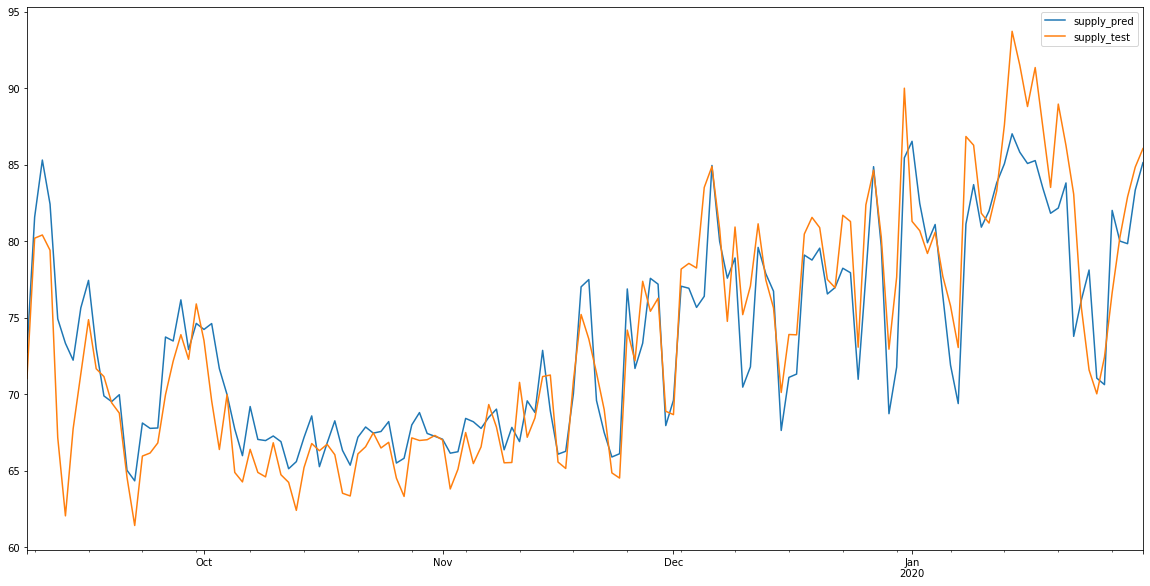

In [24]:
index = pd.date_range(y_test.index[0], y_test.index[-1])
columns = []

smp_supply_pred = pd.DataFrame(index=index, columns=columns)
smp_supply_pred['supply_pred'] = preds
smp_supply_pred['supply_test'] = y_test

smp_supply_pred.plot(figsize=(20,10))

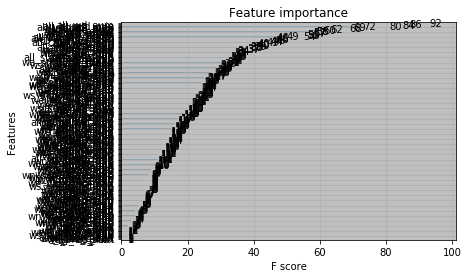

In [25]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 50]
plt.show()

In [595]:
importance = xg_reg.get_booster().get_score(importance_type='weight')
#dict tpye

importance_df = pd.DataFrame([importance]).T

In [596]:
importance_df.sort_values(by=0, ascending=False, inplace=True)

In [597]:
features = importance_df[importance_df[0] >= 30]
features.head()

,0
all_wd_sum,92
all_humid_min,86
all_vaporP_max,84
all_ws_max,80
all_landP_sum,72


In [598]:
feature_name = features.index.tolist()

In [599]:
data2 = data.reindex(columns=feature_name)

In [600]:
# training one more time with extracted features.

X1 = data2.iloc[:]

In [601]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, shuffle=False)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 0.2,
                max_depth = 20, alpha = 10, n_estimators = 1000)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE supply: %f" % (rmse))

RMSE supply: 4.107652


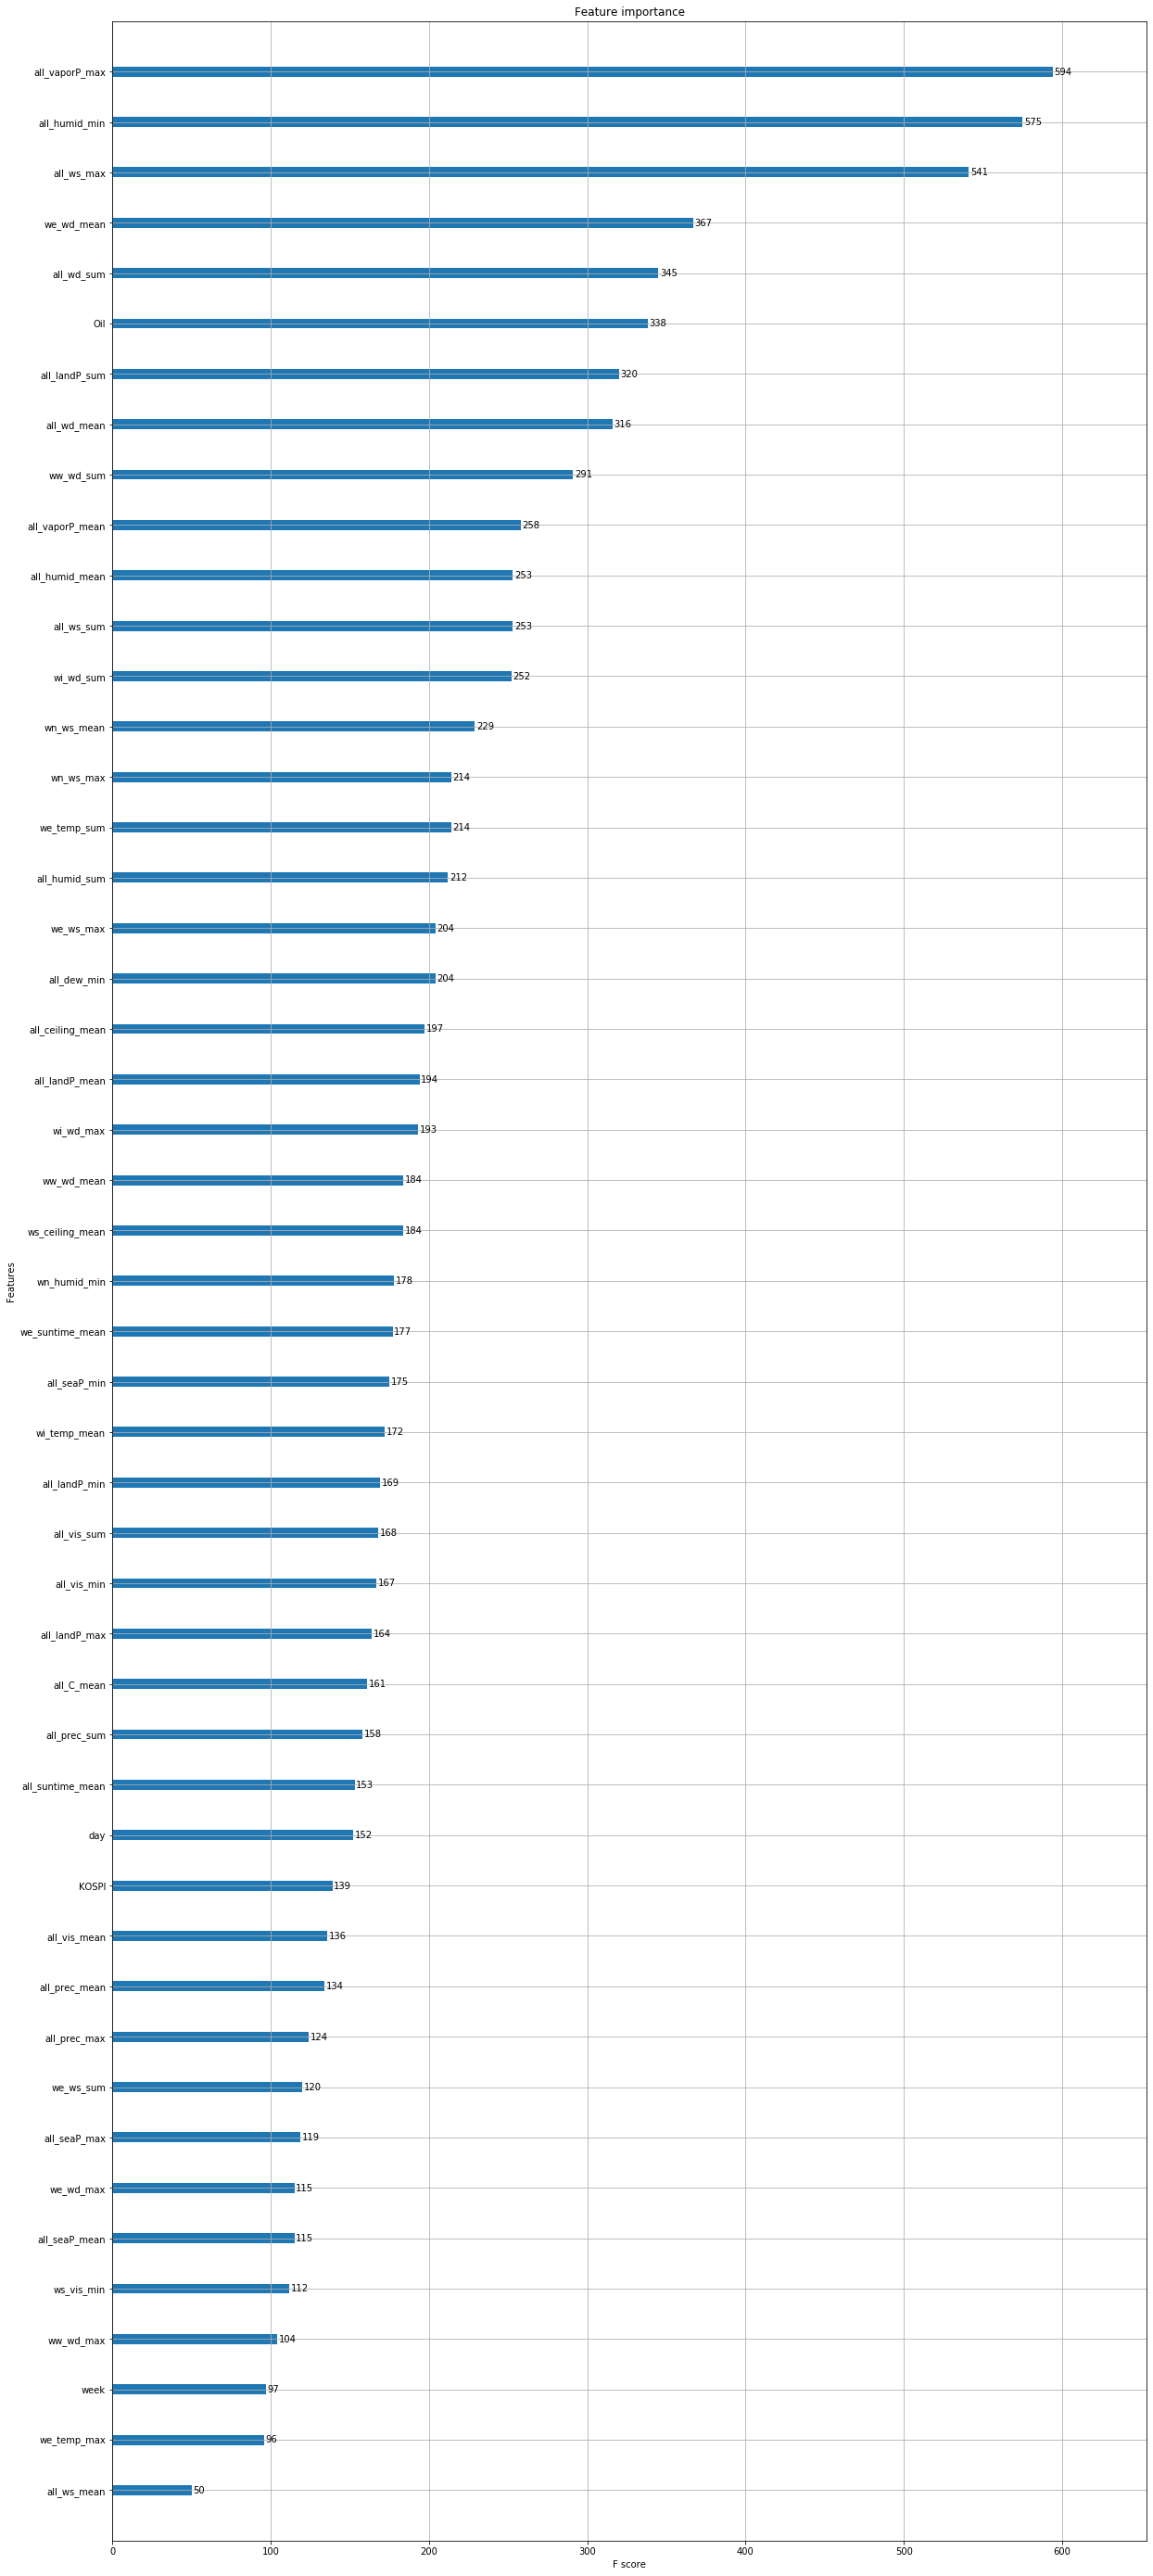

In [602]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 50]
plt.show()

----------------------

In [603]:
data.head()

,all_prec_max,all_prec_min,all_prec_mean,all_prec_sum,all_ws_max,all_ws_min,all_ws_mean,all_ws_sum,all_wd_max,all_wd_min,...,wi_vis_sum,week,month,day,LNG,Oil,Coal,KOSPI,KOSDAQ,supply
2018-02-01,0.5,0.0,0.003444,2.5,12.7,0.0,3.523141,2938.3,360.0,0.0,...,0.0,3,2,1,56.000000,64.760002,1.15,2578.909912,916.780029,87.47
2018-02-02,0.0,0.0,0.000000,0.0,13.6,0.0,3.852709,3413.5,360.0,0.0,...,0.0,4,2,2,57.639999,65.989998,1.06,2565.989990,911.460022,86.64
2018-02-03,5.5,0.0,0.289295,229.7,19.8,0.0,5.602110,4778.6,360.0,0.0,...,0.0,5,2,3,54.860001,65.099998,1.06,2487.340088,876.630005,88.28
2018-02-04,3.5,0.0,0.270012,220.6,20.2,0.7,5.975114,5234.2,360.0,0.0,...,0.0,6,2,4,54.860001,65.099998,1.06,2487.340088,876.630005,86.14
2018-02-05,6.6,0.0,0.243742,192.8,17.6,0.1,5.134080,4353.7,360.0,0.0,...,0.0,0,2,5,54.860001,65.099998,1.03,2487.340088,876.630005,90.63


In [604]:
print(data.columns)

Index(['all_prec_max', 'all_prec_min', 'all_prec_mean', 'all_prec_sum',
       'all_ws_max', 'all_ws_min', 'all_ws_mean', 'all_ws_sum', 'all_wd_max',
       'all_wd_min',
       ...
       'wi_vis_sum', 'week', 'month', 'day', 'LNG', 'Oil', 'Coal', 'KOSPI',
       'KOSDAQ', 'supply'],
      dtype='object', length=341)


In [605]:
data['datetime'] = data.index

In [606]:
len(data)

730

In [607]:
data['num'] = np.arange(0,730)

In [608]:
data.index = data.num
data.drop('num', axis=1, inplace=True)

In [609]:
data.head()

,all_prec_max,all_prec_min,all_prec_mean,all_prec_sum,all_ws_max,all_ws_min,all_ws_mean,all_ws_sum,all_wd_max,all_wd_min,...,week,month,day,LNG,Oil,Coal,KOSPI,KOSDAQ,supply,datetime
num,,,,,,,,,,,,,,,,,,,,,
0,0.5,0.0,0.003444,2.5,12.7,0.0,3.523141,2938.3,360.0,0.0,...,3,2,1,56.000000,64.760002,1.15,2578.909912,916.780029,87.47,2018-02-01
1,0.0,0.0,0.000000,0.0,13.6,0.0,3.852709,3413.5,360.0,0.0,...,4,2,2,57.639999,65.989998,1.06,2565.989990,911.460022,86.64,2018-02-02
2,5.5,0.0,0.289295,229.7,19.8,0.0,5.602110,4778.6,360.0,0.0,...,5,2,3,54.860001,65.099998,1.06,2487.340088,876.630005,88.28,2018-02-03
3,3.5,0.0,0.270012,220.6,20.2,0.7,5.975114,5234.2,360.0,0.0,...,6,2,4,54.860001,65.099998,1.06,2487.340088,876.630005,86.14,2018-02-04
4,6.6,0.0,0.243742,192.8,17.6,0.1,5.134080,4353.7,360.0,0.0,...,0,2,5,54.860001,65.099998,1.03,2487.340088,876.630005,90.63,2018-02-05


In [610]:
data.iloc[34]

all_prec_max                    13.7
all_prec_min                       0
all_prec_mean                1.09183
all_prec_sum                   869.1
all_ws_max                      17.1
                        ...         
Coal                            1.02
KOSPI                        2413.39
KOSDAQ                        856.43
supply                         77.36
datetime         2018-03-07 00:00:00
Name: 34, Length: 342, dtype: object

In [611]:
data_re = data.copy()
data_re.index = pd.date_range('2018-03-07', '2020-03-05')

In [612]:
data_re.head()

,all_prec_max,all_prec_min,all_prec_mean,all_prec_sum,all_ws_max,all_ws_min,all_ws_mean,all_ws_sum,all_wd_max,all_wd_min,...,week,month,day,LNG,Oil,Coal,KOSPI,KOSDAQ,supply,datetime
2018-03-07,0.5,0.0,0.003444,2.5,12.7,0.0,3.523141,2938.3,360.0,0.0,...,3,2,1,56.000000,64.760002,1.15,2578.909912,916.780029,87.47,2018-02-01
2018-03-08,0.0,0.0,0.000000,0.0,13.6,0.0,3.852709,3413.5,360.0,0.0,...,4,2,2,57.639999,65.989998,1.06,2565.989990,911.460022,86.64,2018-02-02
2018-03-09,5.5,0.0,0.289295,229.7,19.8,0.0,5.602110,4778.6,360.0,0.0,...,5,2,3,54.860001,65.099998,1.06,2487.340088,876.630005,88.28,2018-02-03
2018-03-10,3.5,0.0,0.270012,220.6,20.2,0.7,5.975114,5234.2,360.0,0.0,...,6,2,4,54.860001,65.099998,1.06,2487.340088,876.630005,86.14,2018-02-04
2018-03-11,6.6,0.0,0.243742,192.8,17.6,0.1,5.134080,4353.7,360.0,0.0,...,0,2,5,54.860001,65.099998,1.03,2487.340088,876.630005,90.63,2018-02-05


In [613]:
data_re.tail()

,all_prec_max,all_prec_min,all_prec_mean,all_prec_sum,all_ws_max,all_ws_min,all_ws_mean,all_ws_sum,all_wd_max,all_wd_min,...,week,month,day,LNG,Oil,Coal,KOSPI,KOSDAQ,supply,datetime
2020-03-01,17.0,0.0,2.545863,2153.8,20.1,0.0,6.300683,5538.3,360.0,0.0,...,0,1,27,59.230000,53.700001,0.235,2192.219971,664.700012,76.64,2020-01-27
2020-03-02,3.0,0.0,0.053865,43.2,12.7,0.0,2.891860,2487.0,360.0,0.0,...,1,1,28,60.040001,52.770000,0.155,2192.219971,664.700012,80.25,2020-01-28
2020-03-03,9.0,0.0,0.248364,204.9,13.6,0.0,3.814221,3379.4,360.0,0.0,...,2,1,29,59.779999,53.970001,0.155,2188.179932,671.080017,82.90,2020-01-29
2020-03-04,13.0,0.0,0.413725,337.6,17.2,0.0,4.689108,4046.7,360.0,0.0,...,3,1,30,58.400002,53.090000,0.155,2181.540039,656.390015,84.85,2020-01-30
2020-03-05,0.5,0.0,0.003041,2.5,13.0,0.0,3.865862,3363.3,360.0,0.0,...,4,1,31,59.380001,52.919998,0.155,2160.600098,660.979980,86.06,2020-01-31


In [614]:
data.drop(['supply', 'datetime'], axis=1, inplace=True)

In [615]:
data_re = data_re.drop('datetime', axis=1)

In [616]:
predic = data_re[-34:]
predic.head()

,all_prec_max,all_prec_min,all_prec_mean,all_prec_sum,all_ws_max,all_ws_min,all_ws_mean,all_ws_sum,all_wd_max,all_wd_min,...,wi_vis_sum,week,month,day,LNG,Oil,Coal,KOSPI,KOSDAQ,supply
2020-02-01,19.6,0.0,1.551418,1258.2,15.1,0.0,3.681978,3350.6,360.0,0.0,...,0.0,6,12,29,60.889999,61.709999,0.16,2202.620117,662.059998,72.94
2020-02-02,4.8,0.0,0.017617,13.9,18.2,0.1,4.290649,3900.2,360.0,0.0,...,0.0,0,12,30,60.889999,61.709999,0.16,2202.620117,662.059998,77.65
2020-02-03,0.6,0.0,0.003524,2.9,20.5,0.0,6.496453,5677.9,360.0,0.0,...,0.0,1,12,31,60.509998,61.680000,0.16,2201.209961,672.530029,90.01
2020-02-04,0.0,0.0,0.000000,0.0,13.0,0.1,3.543367,3178.4,360.0,0.0,...,0.0,2,1,1,61.119999,61.599998,0.16,2201.209961,672.530029,81.30
2020-02-05,0.0,0.0,0.000000,0.0,8.7,0.0,2.670066,2435.1,360.0,0.0,...,0.0,3,1,2,61.119999,61.599998,0.16,2201.209961,672.530029,80.69


In [617]:
y_df = target.supply[34:]

In [618]:
data_re['supply'] = y_df

In [619]:
data_re.tail()

,all_prec_max,all_prec_min,all_prec_mean,all_prec_sum,all_ws_max,all_ws_min,all_ws_mean,all_ws_sum,all_wd_max,all_wd_min,...,wi_vis_sum,week,month,day,LNG,Oil,Coal,KOSPI,KOSDAQ,supply
2020-03-01,17.0,0.0,2.545863,2153.8,20.1,0.0,6.300683,5538.3,360.0,0.0,...,0.0,0,1,27,59.230000,53.700001,0.235,2192.219971,664.700012,NaN
2020-03-02,3.0,0.0,0.053865,43.2,12.7,0.0,2.891860,2487.0,360.0,0.0,...,0.0,1,1,28,60.040001,52.770000,0.155,2192.219971,664.700012,NaN
2020-03-03,9.0,0.0,0.248364,204.9,13.6,0.0,3.814221,3379.4,360.0,0.0,...,0.0,2,1,29,59.779999,53.970001,0.155,2188.179932,671.080017,NaN
2020-03-04,13.0,0.0,0.413725,337.6,17.2,0.0,4.689108,4046.7,360.0,0.0,...,0.0,3,1,30,58.400002,53.090000,0.155,2181.540039,656.390015,NaN
2020-03-05,0.5,0.0,0.003041,2.5,13.0,0.0,3.865862,3363.3,360.0,0.0,...,0.0,4,1,31,59.380001,52.919998,0.155,2160.600098,660.979980,NaN


In [620]:
data_re = data_re.iloc[:-34]

In [621]:
X, y = data_re.iloc[:, :-1], data_re.iloc[:, -1]

In [622]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.2, learning_rate = 0.4,
                max_depth = 15, alpha = 10, n_estimators = 1000)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE supply: %f" % (rmse))

RMSE supply: 7.117551


In [623]:
X_pred = predic.iloc[:, :-1]
preds = xg_reg.predict(X_pred)


In [624]:
preds

array([85.91336 , 81.68283 , 73.862564, 77.1172  , 76.75021 , 83.68889 ,
       84.88489 , 78.5245  , 82.615105, 79.61667 , 82.35171 , 85.202995,
       84.89728 , 85.29052 , 83.25674 , 82.87026 , 83.37589 , 82.98817 ,
       83.37621 , 82.934204, 80.338646, 84.57016 , 78.505066, 75.24169 ,
       85.777504, 84.43762 , 80.35202 , 79.28803 , 78.27304 , 81.255   ,
       80.896255, 83.12055 , 86.50999 , 84.173004], dtype=float32)

In [625]:
pr = pd.DataFrame(preds)

In [626]:
pr = pr.rename(columns = {0: 'suuply'})

In [627]:
pr.index = pd.date_range('2020-02-01', '2020-03-05')

In [633]:
pr.to_csv('supply_prediction.csv')